<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:60px;background-color:#7A007A;overflow:hidden;font-weight:800">Telco Customer Churn - F1 Score: 88%</div>

## <b><div style='padding:15px;background-color:#000080;color:white;border-radius:40px;font-size:100%;text-align: center'>1  |  About Dataset</div></b>

## Refer to DL05_K297_Midterm.pdf

## <b><div style='padding:15px;background-color:#000080;color:white;border-radius:40px;font-size:110%;text-align: center'>2  |  Import Libraries</div></b>

In [3]:
# importing libraries for data processing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# importing libraries for machine learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
    
from sklearn import metrics


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# full display of columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

## <b><div style='padding:15px;background-color:#000080;color:white;border-radius:40px;font-size:110%;text-align: center'>3  |  Download Dataset</div></b>

In [4]:
df = pd.read_csv("telco_customer_churn.csv")
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## <b><div style='padding:15px;background-color:#000080;color:white;border-radius:40px;font-size:110%;text-align: center'>4  |  Inspecting and Cleaning Dataset</div></b>

<div class="alert alert-block alert-info" style="background-color:#DCECFD;color:#680EAB;border-color:black;width:100%;margin: auto;text-align: center;"><b>Comment:</b> This dataset includes 21 columns & 7043 rows. There is no missing & duplicated values </div>

In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe(include = 'all')

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [8]:
df.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.duplicated().sum()

0

## <b><div style='padding:15px;background-color:#000080;color:white;border-radius:40px;font-size:110%;text-align: center'>5  |  EDA</div></b>

# 5.1 Define numerical & categorical variables

First, I will define the numerical variables using the select_dtypes function. Then, I will examine the unique values of each variable to determine whether they are truly numerical or categorical.

In [10]:
# check numerical variables
num_cols = df.select_dtypes('number').columns
num_cols

Index(['SeniorCitizen', 'Tenure', 'MonthlyCharges'], dtype='object')

In [11]:
# check unique values of each variable
for col in num_cols:
    if df[col].nunique() < 10:
        print(f'Column name: {col} \n#unique values: {df[col].nunique()} {df[col].unique()}\n')
    else:
        print(f'Column name: {col} \n#unique values: {df[col].nunique()}\n')

Column name: SeniorCitizen 
#unique values: 2 [0 1]

Column name: Tenure 
#unique values: 73

Column name: MonthlyCharges 
#unique values: 1585



We observe that "SeniorCitizen" is a categorical variable, so we will include it in the categorical group

In [12]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

Next, I will define the categorical variables using the select_dtypes function again. After that, I will check the unique values of each variable to assess whether they are genuinely categorical, numerical, or if any variables need to be removed.

In [13]:
# define category columns
cat_cols = df.select_dtypes('object').columns.to_list()
cat_cols.append('SeniorCitizen') # add SeniorCitizen to categorical variable

print(f'total: {len(cat_cols)}')
print(cat_cols)

total: 20
['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn', 'SeniorCitizen']


In [14]:
col_names = []
unique_values = []
values = []

#cleaning up values
for col in ['OnlineBackup', 'StreamingMovies', 'StreamingTV', 'TechSupport',
            'DeviceProtection', 'OnlineSecurity', 'MultipleLines']:
    df[col] = np.where((df[col] == 'No phone service') | (df[col] == 'No internet service'), 'No', 'Yes')

#check categorical variables
for col in cat_cols:
    if df[col].nunique() < 10:
        col_names.append(col)
        unique_values.append(df[col].nunique())
        values.append(df[col].unique())
    else:
        col_names.append(col)
        unique_values.append(df[col].nunique())
        values.append('')

cat_table = pd.DataFrame({'col name': col_names,
                          'unique values': unique_values,
                          'values': values})

cat_table.sort_values(by='unique values', ascending=False)


,col name,unique values,values
0,CustomerID,7043,
17,TotalCharges,6531,
16,PaymentMethod,4,"[Electronic check, Mailed check, Bank transfer..."
14,Contract,3,"[Month-to-month, One year, Two year]"
7,InternetService,3,"[DSL, Fiber optic, No]"
11,TechSupport,2,"[Yes, No]"
18,Churn,2,"[No, Yes]"
15,PaperlessBilling,2,"[Yes, No]"
13,StreamingMovies,2,"[Yes, No]"
12,StreamingTV,2,"[Yes, No]"


Dropping the "CustomerID" column as it holds no analytical significance

In [15]:
df.drop(columns = ['CustomerID'], inplace = True)

In [16]:
df.duplicated().sum()

23

After dropping the "CustomerID" column, we identified duplicated values in the dataset. Therefore, I'm going to remove them

In [17]:
#Drop CustomerID because there is no meaning in analytics
df.drop_duplicates(inplace=True)

Convert TotalCharges to number datatype

In [18]:
#Convert TotalCharges to number data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].astype('float')


#### Finalize variable types

<div class="alert alert-block alert-info" style="background-color:#DCECFD;color:#680EAB;border-color:black;width:100%;margin: auto;text-align: center;"><b>Comment:</b> After reviewing the dataset, we have defined the 3 numerical and 17 categorical columns as below </div>

In [19]:
num_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']
cat_cols = ['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
            'PaymentMethod','Churn', 'SeniorCitizen']

print('numerical variables', len(num_cols),  num_cols)
print('categorical variables', len(cat_cols), cat_cols)


numerical variables 3 ['Tenure', 'MonthlyCharges', 'TotalCharges']
categorical variables 17 ['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen']


# 5.2 Analyze 1 variable

### 5.2.1 Analyze numerical variables

<div class="alert alert-block alert-info" style="background-color:#DCECFD;color:#680EAB;border-color:black;width:100%;margin: auto;text-align: center;"><b>Comment:</b> We have 03 numerical variables, and overall, there are no outliers, nor do these variables follow a normal distribution. It is observed that the "TotalCharges" variable is right-skewed and has a high variance. Therefore, I may consider applying log normalization or using a standard scaler for these variables. </div>

== Column name: Tenure
Median: 29.0
Mean: 32.47393162393163


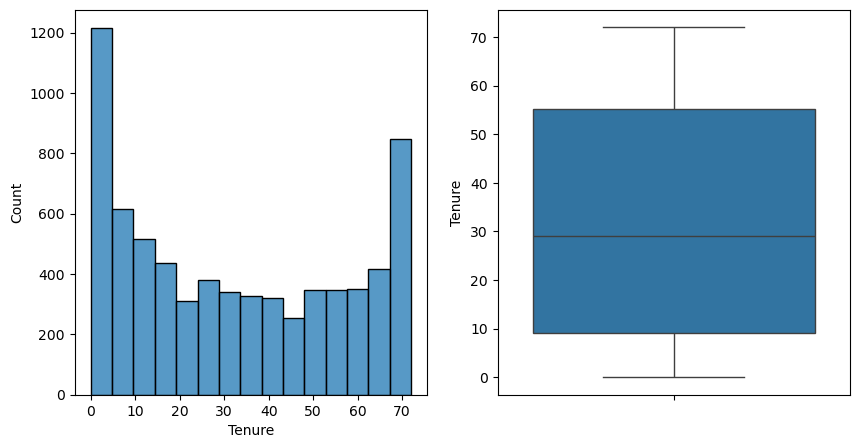

== Column name: MonthlyCharges
Median: 70.4
Mean: 64.85403846153847


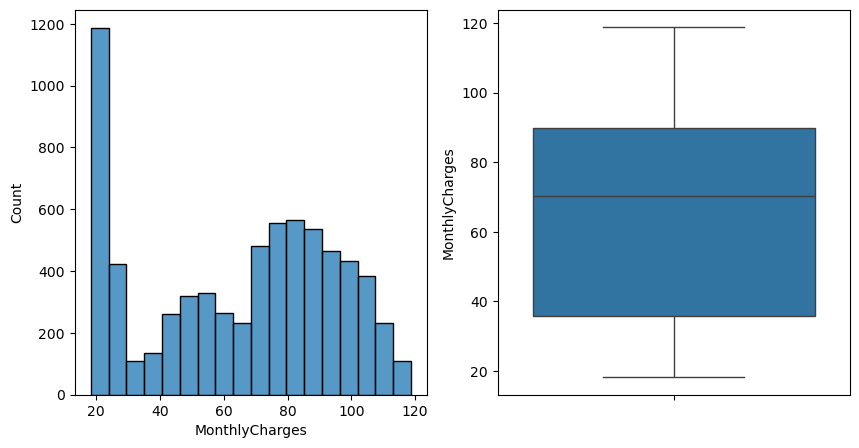

== Column name: TotalCharges
Median: 1404.65
Mean: 2290.673056070766


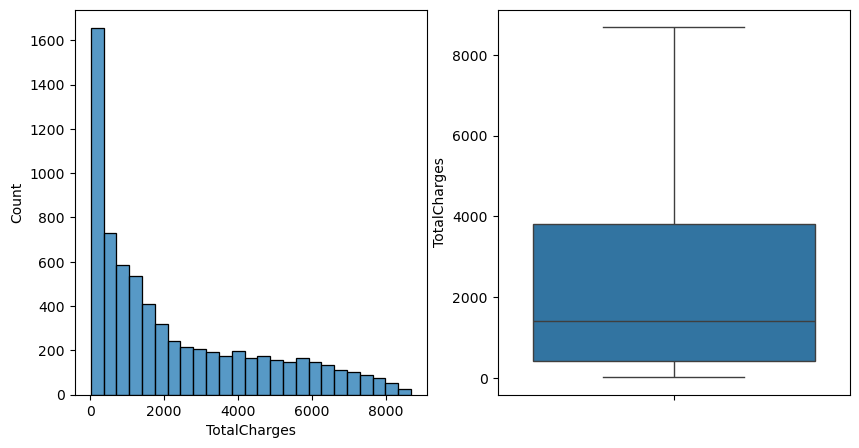

In [20]:
for col in num_cols:
    print(f'== Column name: {col}\nMedian: {df[col].median()}\nMean: {df[col].mean()}')
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(df, x=col)
    
    plt.subplot(1,2,2)
    sns.boxplot(data=df, y = col)
    plt.show()
    

<Axes: >

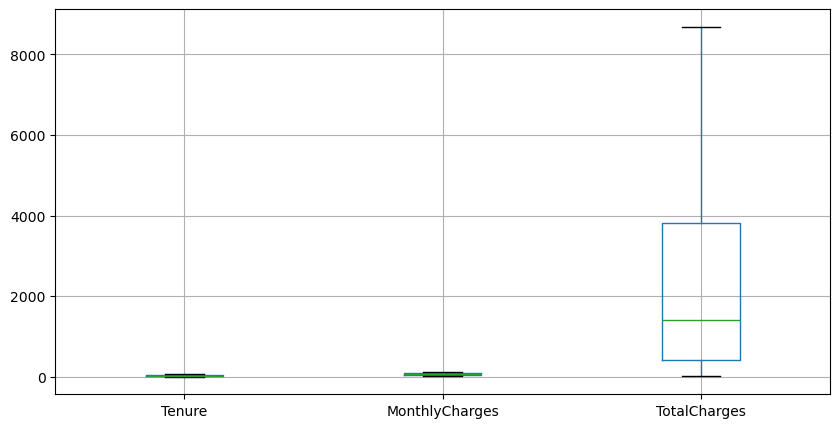

In [21]:
plt.figure(figsize=(10,5))
df[num_cols].boxplot()

### 5.2.2 Analyze categorical variable

<div class="alert alert-block alert-info" style="background-color:#DCECFD;color:#680EAB;border-color:black;width:100%;margin: auto;text-align: center;"><b>Comment:</b> We see that this dataset is imbalanced. I'm going to use "Oversampling" method to balance dataset later </div>

===Col name: Gender 
#unique values: 2 ['Female' 'Male']
Mode: Male

Gender
Male      3540
Female    3480
Name: count, dtype: int64


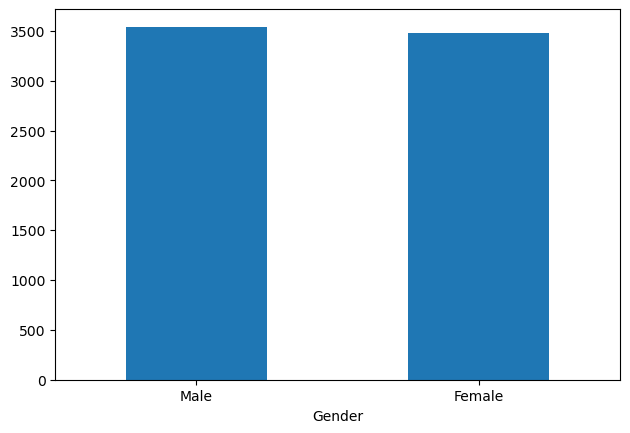

----------------------------------------

===Col name: Partner 
#unique values: 2 ['Yes' 'No']
Mode: No

Partner
No     3618
Yes    3402
Name: count, dtype: int64


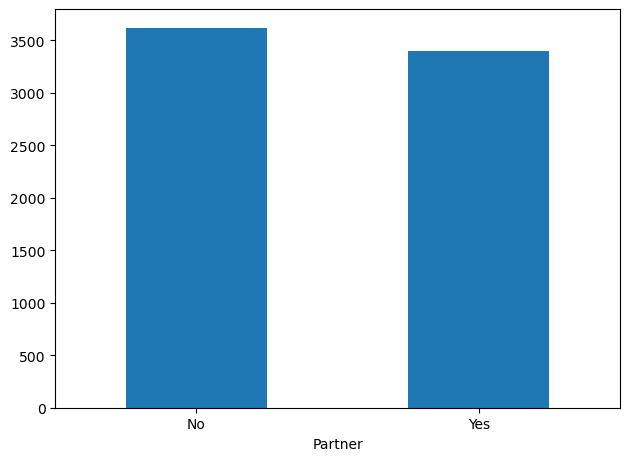

----------------------------------------

===Col name: Dependents 
#unique values: 2 ['No' 'Yes']
Mode: No

Dependents
No     4910
Yes    2110
Name: count, dtype: int64


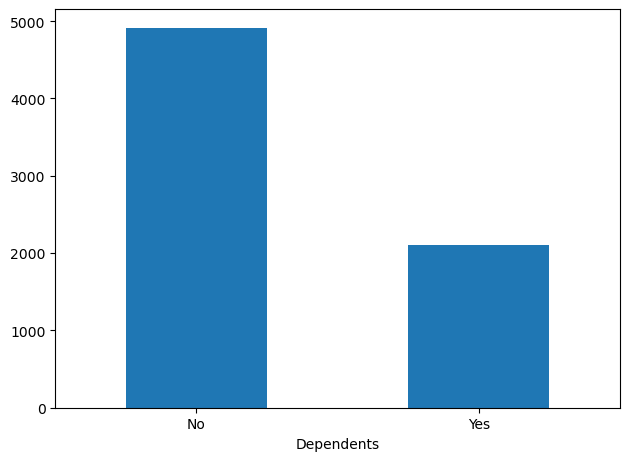

----------------------------------------

===Col name: PhoneService 
#unique values: 2 ['No' 'Yes']
Mode: Yes

PhoneService
Yes    6338
No      682
Name: count, dtype: int64


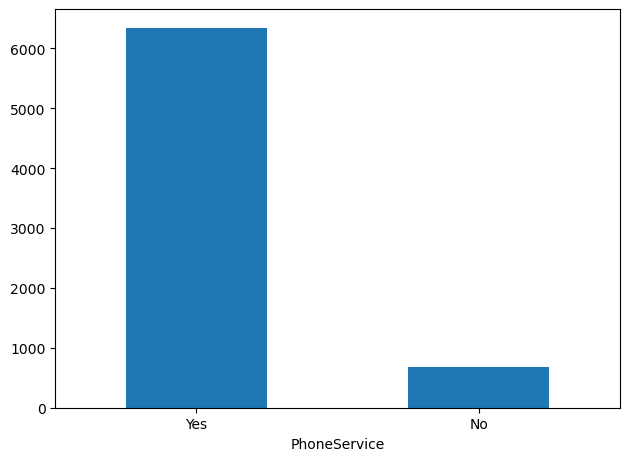

----------------------------------------

===Col name: MultipleLines 
#unique values: 2 ['No' 'Yes']
Mode: Yes

MultipleLines
Yes    6338
No      682
Name: count, dtype: int64


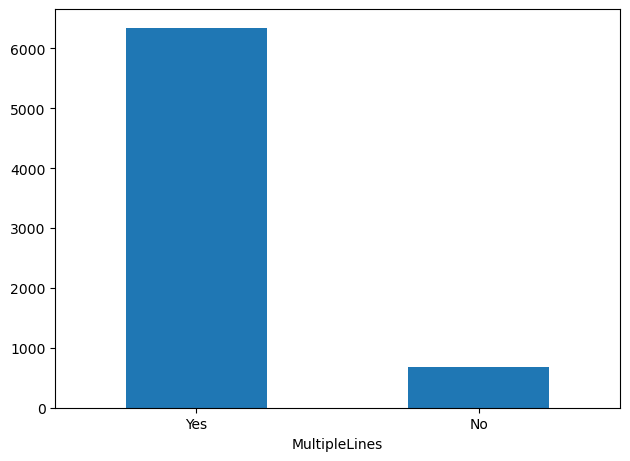

----------------------------------------

===Col name: InternetService 
#unique values: 3 ['DSL' 'Fiber optic' 'No']
Mode: Fiber optic

InternetService
Fiber optic    3090
DSL            2418
No             1512
Name: count, dtype: int64


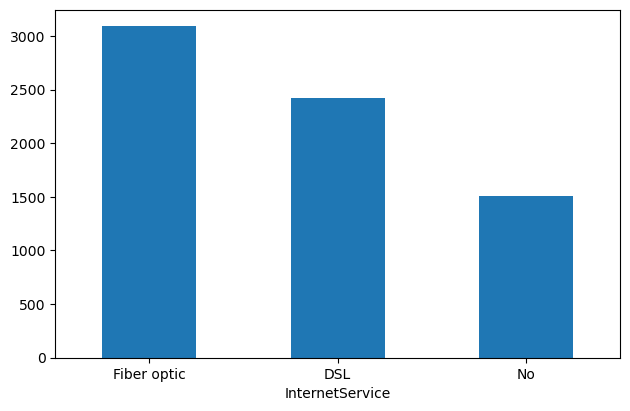

----------------------------------------

===Col name: OnlineSecurity 
#unique values: 2 ['Yes' 'No']
Mode: Yes

OnlineSecurity
Yes    5508
No     1512
Name: count, dtype: int64


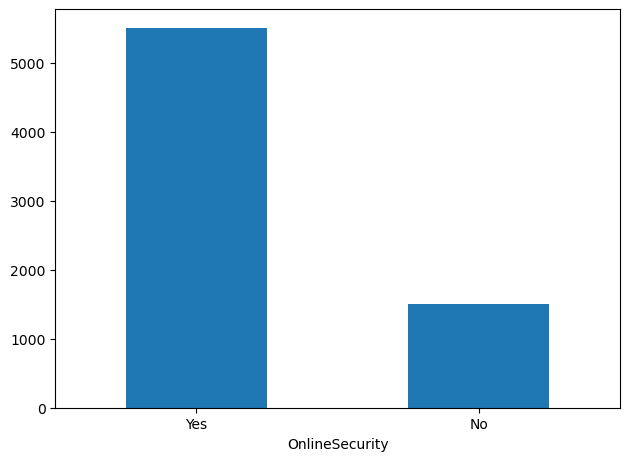

----------------------------------------

===Col name: OnlineBackup 
#unique values: 2 ['Yes' 'No']
Mode: Yes

OnlineBackup
Yes    5508
No     1512
Name: count, dtype: int64


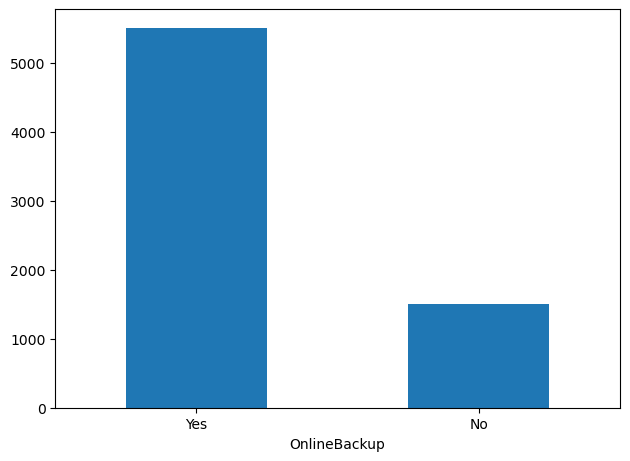

----------------------------------------

===Col name: DeviceProtection 
#unique values: 2 ['Yes' 'No']
Mode: Yes

DeviceProtection
Yes    5508
No     1512
Name: count, dtype: int64


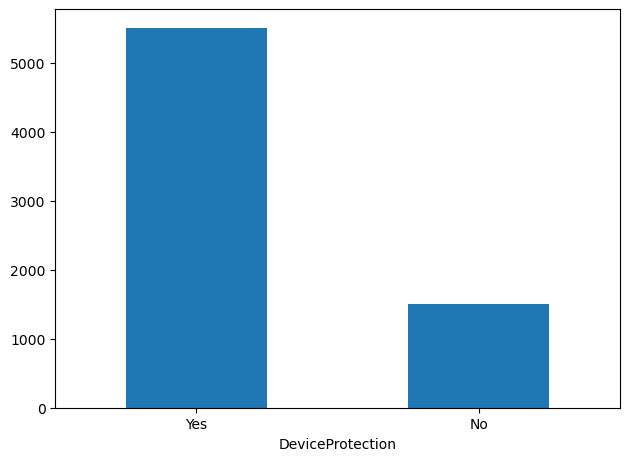

----------------------------------------

===Col name: TechSupport 
#unique values: 2 ['Yes' 'No']
Mode: Yes

TechSupport
Yes    5508
No     1512
Name: count, dtype: int64


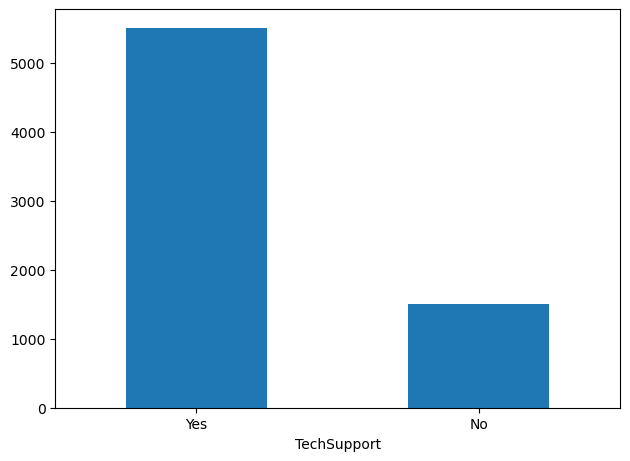

----------------------------------------

===Col name: StreamingTV 
#unique values: 2 ['Yes' 'No']
Mode: Yes

StreamingTV
Yes    5508
No     1512
Name: count, dtype: int64


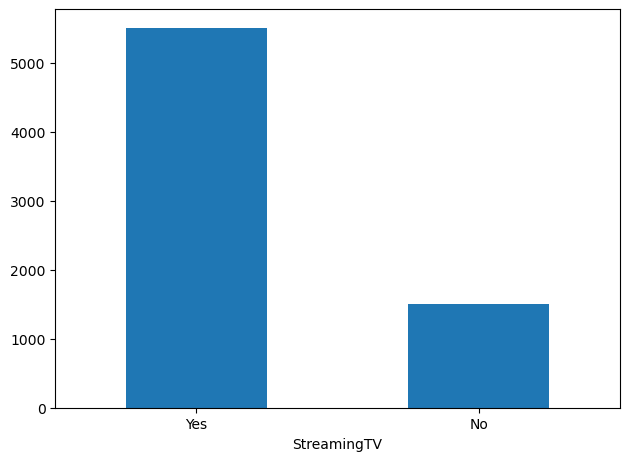

----------------------------------------

===Col name: StreamingMovies 
#unique values: 2 ['Yes' 'No']
Mode: Yes

StreamingMovies
Yes    5508
No     1512
Name: count, dtype: int64


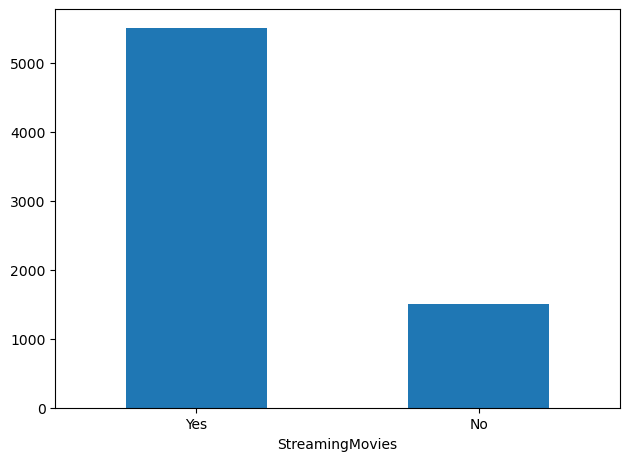

----------------------------------------

===Col name: Contract 
#unique values: 3 ['Month-to-month' 'One year' 'Two year']
Mode: Month-to-month

Contract
Month-to-month    3852
Two year          1695
One year          1473
Name: count, dtype: int64


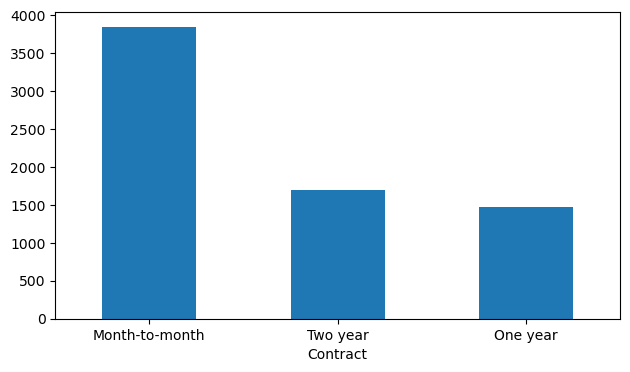

----------------------------------------

===Col name: PaperlessBilling 
#unique values: 2 ['Yes' 'No']
Mode: Yes

PaperlessBilling
Yes    4160
No     2860
Name: count, dtype: int64


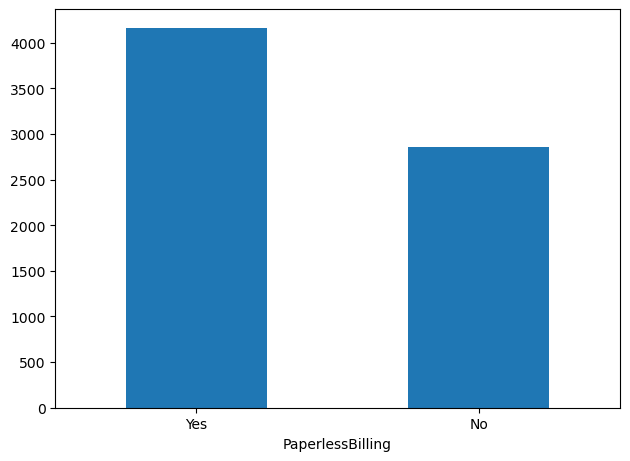

----------------------------------------

===Col name: PaymentMethod 
#unique values: 4 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Mode: Electronic check

PaymentMethod
Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1521
Name: count, dtype: int64


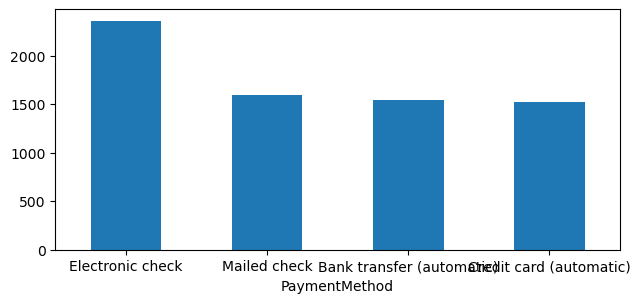

----------------------------------------

===Col name: Churn 
#unique values: 2 ['No' 'Yes']
Mode: No

Churn
No     5163
Yes    1857
Name: count, dtype: int64


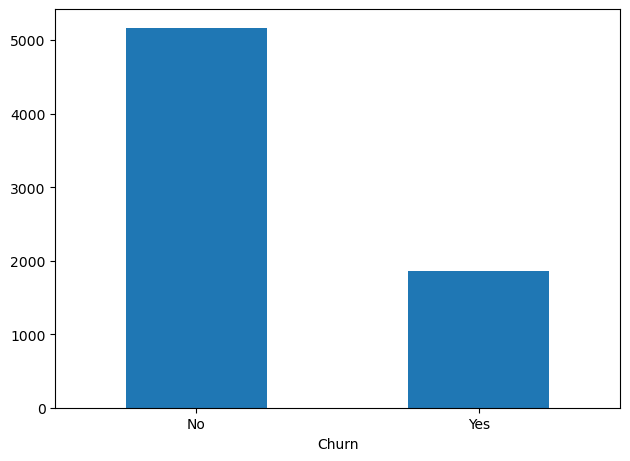

----------------------------------------

===Col name: SeniorCitizen 
#unique values: 2 [0 1]
Mode: 0

SeniorCitizen
0    5879
1    1141
Name: count, dtype: int64


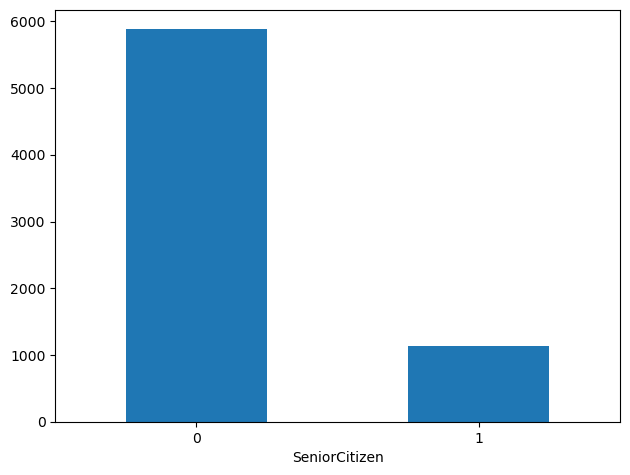

----------------------------------------



In [22]:
for col in cat_cols:
    print(f'===Col name: {col} \n#unique values: {df[col].nunique()} {df[col].unique()}\nMode: {df[col].mode()[0]}\n')
    print(df[col].value_counts())

    df[col].value_counts().plot.bar()
    plt.tight_layout()
    plt.xticks(rotation = 0)
    plt.show()

    print('--'*20)
    print('')

# 5.3 Analyze 2 variables

### 5.3.1 Numerical x numerical

First, I will begin by analyzing the correlation between the numerical variables. This will help us understand the relationships between them and identify any potential multicollinearity issues.

In [23]:
num_corr = df[num_cols].corr()
num_corr

,Tenure,MonthlyCharges,TotalCharges
Tenure,1.000000,0.245193,0.825267
MonthlyCharges,0.245193,1.000000,0.650526
TotalCharges,0.825267,0.650526,1.000000


<Axes: >

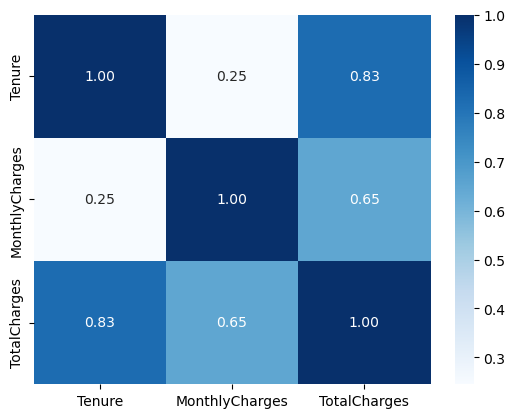

In [24]:
sns.heatmap(num_corr, annot=True, fmt='.2f', cmap='Blues', cbar=True)

<div class="alert alert-block alert-info" style="background-color:#DCECFD;color:#680EAB;border-color:black;width:100%;margin: auto;text-align: center;"><b>Comment:</b> Based on the results, it is evident that 'TotalCharges' is highly correlated with both 'Tenure' (83%) and 'MonthlyCharges' (65%), which contributes to multicollinearity. To address this issue, I decided to eliminate 'Tenure' and 'MonthlyCharges' and only use 'TotalCharges' in my model </div>

In [25]:
df.groupby('Churn')['TotalCharges'].count()

Churn
No     5152
Yes    1857
Name: TotalCharges, dtype: int64

In [26]:
df.dropna(inplace=True)

### 5.3.2 Numerical x categorical

Next, I will examine the relationship between the "TotalCharges" and "Churn" variables to determine whether this numerical variable has an impact on the "Churn" outcome. I plan to conduct an ANOVA hypothesis test for this assessment.

If the feature influences on the target, I will include it in the 'dependent' variable.

In [27]:
from scipy.stats import f_oneway

dependent = []
for col in ['TotalCharges']:
    lst = []
    print(f'{col}\nHypothesis:\n H0: {col} and Churn are independent\n H1: {col} and Churn are dependent\n')

    for name, g in df.groupby('Churn'):
        lst.append(g[col])
    f_statistic, p_value = f_oneway(*lst)
    print('p-value:', p_value)
    
    if p_value < 0.05:
        dependent.append(col)
        print(f'== RESULT: reject H0: {col} and Churn are dependent')
    else:
        print(f'== RESULT: accept H0: {col} and Churn are independent')
    print('----')   


TotalCharges
Hypothesis:
 H0: TotalCharges and Churn are independent
 H1: TotalCharges and Churn are dependent

p-value: 3.436385600348015e-63
== RESULT: reject H0: TotalCharges and Churn are dependent
----


<div class="alert alert-block alert-info" style="background-color:#DCECFD;color:#680EAB;border-color:black;width:100%;margin: auto;text-align: center;"><b>RESULT:</b> reject H0: TotalCharges and Churn are dependent </div>

<Axes: xlabel='TotalCharges'>

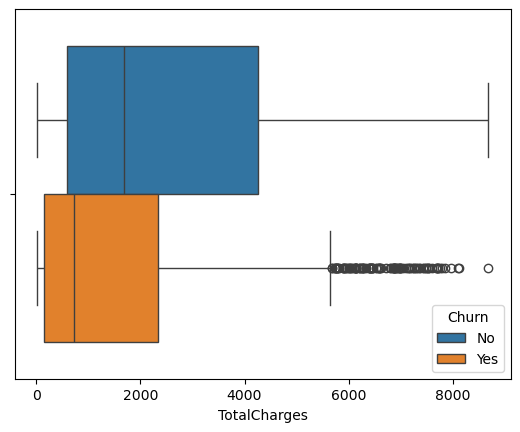

In [28]:
sns.boxplot(df, x = 'TotalCharges', hue = 'Churn')

### 5.2.3 Categorical x Categorical

Next, I will analyze the relationship between categorical variables and the target ("Churn") to assess whether each categorical variable influences the "Churn" outcome. I plan to conduct an Chi-squared hypothesis test for this assessment.

In [29]:
#remove output value
cat_cols.remove('Churn')

If the feature is appropriate, I will include it in the 'dependent' variable created above

In [30]:
from scipy.stats import chi2_contingency

i=0
for col in cat_cols:
    i = i + 1
    print(f'{i}. {col}\n Hypothesis:\n H0: {col} and Churn are independent\n H1: {col} and Churn are dependent\n')
    cross_tab = pd.crosstab(df[col], df['Churn'])
    print(cross_tab)

    chi2,p,dof,expected = chi2_contingency(cross_tab)
    print('p-value = ', p)
    
    if p < 0.05:
        dependent.append(col)
        print(f'== RESULT: reject H0: {col} and Churn are dependent')
    else:
        print(f'== RESULT: accept H0: {col} and Churn are independent')
    print('----\n')


1. Gender
 Hypothesis:
 H0: Gender and Churn are independent
 H1: Gender and Churn are dependent

Churn     No  Yes
Gender           
Female  2541  934
Male    2611  923
p-value =  0.4878139986932274
== RESULT: accept H0: Gender and Churn are independent
----

2. Partner
 Hypothesis:
 H0: Partner and Churn are independent
 H1: Partner and Churn are dependent

Churn      No   Yes
Partner            
No       2428  1188
Yes      2724   669
p-value =  1.8502988747883716e-35
== RESULT: reject H0: Partner and Churn are dependent
----

3. Dependents
 Hypothesis:
 H0: Dependents and Churn are independent
 H1: Dependents and Churn are dependent

Churn         No   Yes
Dependents            
No          3379  1531
Yes         1773   326
p-value =  6.103202157584747e-42
== RESULT: reject H0: Dependents and Churn are dependent
----

4. PhoneService
 Hypothesis:
 H0: PhoneService and Churn are independent
 H1: PhoneService and Churn are dependent

Churn           No   Yes
PhoneService            


<div class="alert alert-block alert-info" style="background-color:#DCECFD;color:#680EAB;border-color:black;width:100%;margin: auto;text-align: center;"><b>Comment:</b> After performing the chi-squared and ANOVA hypothesis tests, I save all the valid features in the "dependent" variable. In total, there are 14 features </div>

In [31]:
print(len(dependent))
print(dependent)

14
['TotalCharges', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']


## <b><div style='padding:15px;background-color:#000080;color:white;border-radius:40px;font-size:110%;text-align: center'>6  |  Machine Learning</div></b>

# 6.1 Logistic Regression

### 6.1.1 Define input & output & encoding categorical features

I apply get fummies to encode categorical features

In [32]:
X = pd.get_dummies(df[dependent])
y = np.where(df['Churn']=='Yes', 1,0)

### 6.1.2 Resolve imbalanced data

In [33]:
from sklearn.utils import resample

# Separate minority and majority classes
X_minority = X[y == 1]
y_minority = y[y == 1] 
X_majority = X[y == 0]
y_majority = y[y == 0]

# Oversample minority class
X_minority_oversampled, y_minority_oversampled = resample(X_minority, y_minority, replace=True,  n_samples=len(y_majority), random_state=0)

# Combine the majority class with the oversampled minority class
X_oversampled = pd.concat([X_majority, X_minority_oversampled], ignore_index=True)
y_oversampled = pd.concat([pd.Series(y_majority), pd.Series(y_minority_oversampled)], ignore_index = True)

# Check the new class distribution
print(y_oversampled.value_counts())

0    5152
1    5152
Name: count, dtype: int64


### 6.1.3 Log normalization

As previously noted, we found that "TotalCharges" is right-skewed and has high variance. Therefore, I plan to apply log normalization to this feature.

In [34]:
df['TotalCharges'] = np.log(df['TotalCharges'])

### 6.1.4 Create Logistic Regression model

Now we start to create Logistic Regression model

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

### 6.1.5 Split datasets to train & test

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_oversampled,y_oversampled,random_state=42,test_size=0.2)

### 6.1.6 Train model

In [37]:
model.fit(X_train,y_train)

LogisticRegression()

In [38]:
model.feature_names_in_

array(['TotalCharges', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'SeniorCitizen_0', 'SeniorCitizen_1'], dtype=object)

### 6.1.7 Predict model

In [39]:
yhat = model.predict(X_test)

### 6.1.8 Evaluation

#### a) Confusion matrix

<div class="alert alert-block alert-info" style="background-color:#DCECFD;color:#680EAB;border-color:black;width:100%;margin: auto;text-align: center;"><b>Comment:</b> The model achieved an overall F1 score of 75.87%. This indicates a moderate balance between precision and recall, suggesting the model is performing well at correctly classifying both the positive and negative cases. However, further fine-tuning or feature adjustments may be necessary to improve the score and ensure better predictive performance across all classes </div>

In [40]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, yhat)
recall = metrics.recall_score(y_test, yhat)
precision = metrics.precision_score(y_test, yhat)
f1 = metrics.f1_score(y_test, yhat)

print('Accuracy score:' , accuracy)
print('Recall score:' , recall)
print('Precision score:' , precision)
print('F1 score:' , f1)


Accuracy score: 0.7491508976225133
Recall score: 0.8033596837944664
Precision score: 0.7188328912466844
F1 score: 0.758749416705553


In [41]:
print(metrics.classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      1049
           1       0.72      0.80      0.76      1012

    accuracy                           0.75      2061
   macro avg       0.75      0.75      0.75      2061
weighted avg       0.75      0.75      0.75      2061



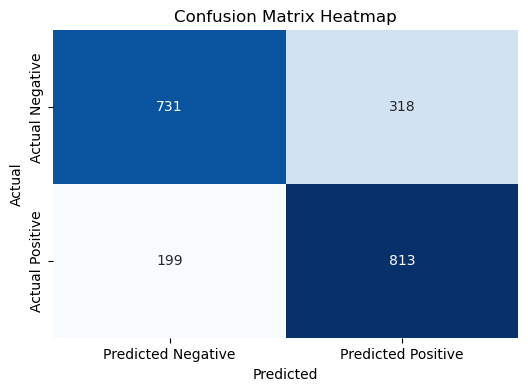

In [42]:
matrix = metrics.confusion_matrix(y_test,yhat)

cm_df = pd.DataFrame(matrix,index = ['Actual Negative', 'Actual Positive'],
                     columns = ['Predicted Negative', 'Predicted Positive'])

plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### b) ROC curve

<div class="alert alert-block alert-info" style="background-color:#DCECFD;color:#680EAB;border-color:black;width:100%;margin: auto;text-align: center;"><b>Comment:</b> The model achieved an ROC AUC score of 82.6%, indicating a good level of discrimination between the positive and negative classes. This suggests the model is effective at distinguishing between the two outcomes, though there may still be room for improvement to further enhance its predictive accuracy </div>

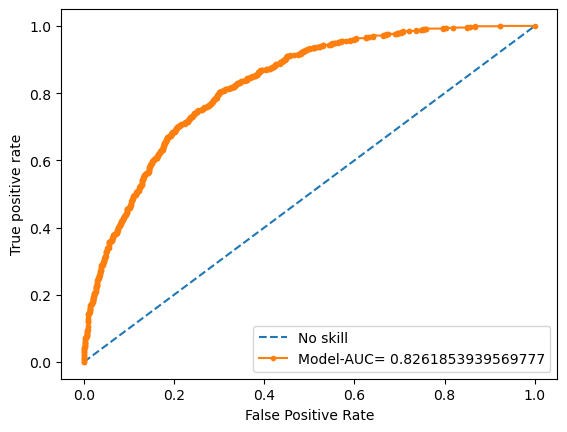

In [43]:
y_prob = model.predict_proba(X_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test, y_prob)
model_auc = metrics.roc_auc_score(y_test,y_prob)
plt.plot([0,1], [0,1], linestyle = '--', label = 'No skill')
plt.plot(fpr, tpr, marker = '.', label = f'Model-AUC= {model_auc}')

plt.xlabel('False Positive Rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show(block=False)

#### c) Precision recall curve

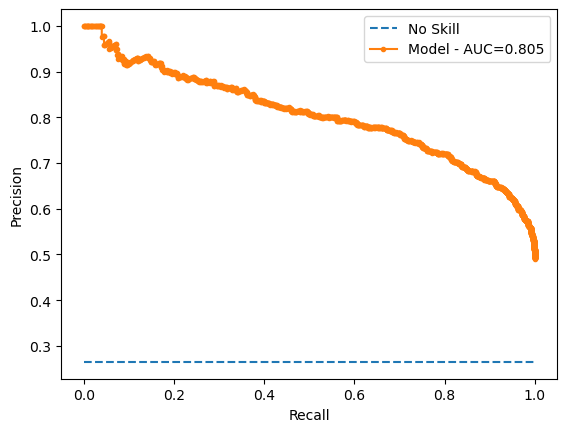

In [44]:
# calculate roc curves
y_prob = model.predict_proba(X_test)[:,1]
precision, recall, threshold = metrics.precision_recall_curve(y_test, y_prob)
# calculate scores
model_auc = metrics.auc(recall, precision)
# plot the roc curve for the model
ns=len(y[y==1]) / len(y)
plt.plot([0,1], [ns,ns], linestyle='--', label='No Skill' )
plt.plot(recall, precision, marker='.', label='Model - AUC=%.3f' % (model_auc))

# show axis labels and the legend
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

### 6.1.7 K-fold Cross Validation

<div class="alert alert-block alert-info" style="background-color:#DCECFD;color:#680EAB;border-color:black;width:100%;margin: auto;text-align: center;"><b>Comment:</b> The standard deviation is 0.013 (or 1.32%), which is relatively low. This suggests that the model's performance is quite stable across different runs or subsets of data, with minimal variation.
 </div>

In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, scoring="f1",cv = 10)
print(scores)

[0.78513357 0.77555817 0.76744186 0.74435196 0.76600698 0.74971429
 0.7627907  0.74626866 0.7791343  0.7656066 ]


In [46]:
print('Score_Std: ', np.std(scores))
print('Score_mean: ', np.mean(scores))

Score_Std:  0.013165517068148983
Score_mean:  0.764200707109312


## <b><div style='padding:15px;background-color:#000080;color:white;border-radius:40px;font-size:110%;text-align: center'>7  |  Save Model</div></b>

In [47]:
import pickle 
def Save_Object(obj, filename):
    with open(filename, 'wb') as file:
        pickle.dump(obj,file)
    return

def Load_Object(filename):
    with open(filename,'rb') as file:
        obj = pickle.load(file)
    return obj

In [48]:
Save_Object(model, 'Logistic_Regression_model.pkl')

## <b><div style='padding:15px;background-color:#000080;color:white;border-radius:40px;font-size:110%;text-align: center'>8  |  Pipeline Creation</div></b>

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

### Creating a function to clean data

In [50]:
def clean_data(df):
    df_new = df.copy()
    
    # 1. Replace empty strings with NaN
    df_new = df_new.replace(' ', np.nan)
    
    # 2. Clean up values for specific columns
    columns_to_clean = ['OnlineBackup', 'StreamingMovies', 'StreamingTV', 
                        'TechSupport', 'DeviceProtection', 
                        'OnlineSecurity', 'MultipleLines']
    
    for col in columns_to_clean:
        df_new[col] = np.where((df_new[col] == 'No phone service') | 
                               (df_new[col] == 'No internet service'), 'No', df_new[col])
    
    return df_new

# Create FunctionTransformer
data_cleaning = FunctionTransformer(clean_data)

### Because numerical and categorical features need different methods to perform data processing, I will split the pipeline into 2 branches.

### num_pipeline is for numerical features and cat_pipeline is for categorical features

In [51]:
num_pipeline = Pipeline(
    steps = [
        ('impute', SimpleImputer(strategy='median')),
        ('scale', StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    steps = [
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('one-hot-encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]
)

In [52]:
num_cols = ['TotalCharges']

cat_cols = ['Partner', 'Dependents',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
            'PaymentMethod', 'SeniorCitizen']

# Create the column transformer
feat_transformer = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_cols),
        ('cat_pipeline', cat_pipeline, cat_cols)
    ],
    remainder='drop',
    n_jobs=-1          
)

### Finalize model pipeline

In [53]:
# Create the full model pipeline
model_pipeline = Pipeline(steps=[
    ('data cleaning', data_cleaning), #cleaning step
    ('preprocessor', feat_transformer)  # Preprocessing step
])

## <b><div style='padding:15px;background-color:#000080;color:white;border-radius:40px;font-size:110%;text-align: center'>9  |  Test Model</div></b>

### Load Logistic Regression model saved

In [54]:
my_model = Load_Object('Logistic_Regression_model.pkl')

### Get sample data from original dataset

In [55]:
X_sample = df.drop(columns = ['Churn']).head(10)
y_sample = np.where(df.iloc[X_sample.index]['Churn'] =='Yes', 1,0)

### Transform sample data using pipeline

In [56]:
model_pipeline.fit(df)

Pipeline(steps=[('data cleaning',
                 FunctionTransformer(func=<function clean_data at 0x17748d940>)),
                ('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['TotalCharges']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot-encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Partner', 'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'SeniorCitizen'])]))])

In [57]:
feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()
feature_names

array(['num_pipeline__TotalCharges', 'cat_pipeline__Partner_No',
       'cat_pipeline__Partner_Yes', 'cat_pipeline__Dependents_No',
       'cat_pipeline__Dependents_Yes',
       'cat_pipeline__InternetService_DSL',
       'cat_pipeline__InternetService_Fiber optic',
       'cat_pipeline__InternetService_No',
       'cat_pipeline__OnlineSecurity_No',
       'cat_pipeline__OnlineSecurity_Yes',
       'cat_pipeline__OnlineBackup_No', 'cat_pipeline__OnlineBackup_Yes',
       'cat_pipeline__DeviceProtection_No',
       'cat_pipeline__DeviceProtection_Yes',
       'cat_pipeline__TechSupport_No', 'cat_pipeline__TechSupport_Yes',
       'cat_pipeline__StreamingTV_No', 'cat_pipeline__StreamingTV_Yes',
       'cat_pipeline__StreamingMovies_No',
       'cat_pipeline__StreamingMovies_Yes',
       'cat_pipeline__Contract_Month-to-month',
       'cat_pipeline__Contract_One year',
       'cat_pipeline__Contract_Two year',
       'cat_pipeline__PaperlessBilling_No',
       'cat_pipeline__PaperlessBill

In [58]:
sample_transformed = pd.DataFrame(model_pipeline.transform(X_sample))
sample_transformed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,-2.304997,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.384575,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-1.470263,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.367626,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-1.251060,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5,-0.156307,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6,0.404811,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7,-0.804610,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8,0.694217,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
9,0.782058,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Predict sample data

In [59]:
y_pred = my_model.predict(sample_transformed)

### Evaluate prediction

In [60]:
accuracy_score = metrics.accuracy_score(y_sample, y_pred)
precision = metrics.precision_score(y_sample, y_pred)
recall = metrics.recall_score(y_sample, y_pred)
f1 = metrics.f1_score(y_sample, y_pred)

print('Accuracy score:' , accuracy)
print('Recall score:' , recall)
print('Precision score:' , precision)
print('F1 score:' , f1)

Accuracy score: 0.7491508976225133
Recall score: 1.0
Precision score: 0.5714285714285714
F1 score: 0.7272727272727273


The f1 score is 72% which performed quite well. However, we can improve the prediction by trying other models

## <b><div style='padding:15px;background-color:#000080;color:white;border-radius:40px;font-size:110%;text-align: center'>10  |  Model Selection</div></b>

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb


First, we'll import all classification models and then train multiple models to determine which performs the best.

In [62]:
models = [LogisticRegression(), KNeighborsClassifier(), BernoulliNB(), DecisionTreeClassifier(), RandomForestClassifier(),
          SVC(), AdaBoostClassifier(),xgb.XGBClassifier()]

from sklearn.model_selection import cross_val_score
import time

scores = []
train_times = []
model_names = []
for model in models:
    start = time.time()
    scores.append(cross_val_score(model, X_train, y_train, scoring = 'f1', cv=5).mean())
    end = time.time()
    train_times.append(end-start)
    model_names.append(model.__class__.__name__)

In [63]:
model_data = pd.DataFrame(
    {
        'model_name': model_names,
        'accuray_score': scores,
        'training_time': train_times
    }
)
model_data.sort_values(by='accuray_score', ascending=False)

,model_name,accuray_score,training_time
4,RandomForestClassifier,0.872083,1.684183
3,DecisionTreeClassifier,0.864188,0.172487
7,XGBClassifier,0.824150,0.409999
6,AdaBoostClassifier,0.778696,0.668927
0,LogisticRegression,0.764886,1.094597
2,BernoulliNB,0.763030,0.046059
1,KNeighborsClassifier,0.737170,0.497067
5,SVC,0.595832,7.730957


<div class="alert alert-block alert-info" style="background-color:#DCECFD;color:#680EAB;border-color:black;width:100%;margin: auto;text-align: center;"><b>Comment:</b> Based on the result, I'd to select RandomForestClassifier for my model </div>

I will use GridSearchCV to find the best parameters for RandomForestClassifier

In [64]:
grid_params = {
 'n_estimators': [50, 100, 200],
 'max_depth': [5, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['sqrt', 'log2']
}

In [65]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(RandomForestClassifier(), grid_params, cv=5)

start=time.time()
grid_search.fit(X_train,y_train)
end=time.time()

print ('Time (in miliseconds):',(end-start))
print(grid_search.best_score_)
print(grid_search.best_params_)


Time (in miliseconds): 277.639132976532
0.8640053253810782
{'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


### I use model.feature_importances_ to define top 10 features important

In [71]:
model_final = RandomForestClassifier(n_estimators=50, max_depth=30, max_features = 'log2',
                            min_samples_leaf = 1, min_samples_split =2)

In [72]:
model.fit(X_train, y_train)
imp_features = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending = False)

In [73]:
imp_features_df = imp_features.reset_index()
imp_features_df.columns = ['Feature', 'Importance']
imp_features_df.head(10)

,Feature,Importance
0,Contract_Month-to-month,0.563118
1,InternetService_Fiber optic,0.101260
2,Contract_One year,0.052902
3,Contract_Two year,0.052083
4,InternetService_No,0.049684
5,InternetService_DSL,0.039060
6,TotalCharges,0.019251
7,PaymentMethod_Electronic check,0.018387
8,PaperlessBilling_No,0.017487
9,PaymentMethod_Mailed check,0.015064


Select top 10 features with highest scores

In [74]:
top_features_list = imp_features_df.iloc[:,0].head(10).tolist()

Train model using top 10 features

In [75]:
X_train_imp = X_train[top_features_list]
X_test_imp = X_test[top_features_list]

model_final.fit(X_train_imp, y_train)
ypred_ = model_final.predict(X_test_imp)

accuracy_score = metrics.accuracy_score(y_test, ypred_)
precision = metrics.precision_score(y_test, ypred_)
recall = metrics.recall_score(y_test, ypred_)
f1 = metrics.f1_score(y_test, ypred_)
report = metrics.classification_report(y_test, ypred_)

print('Accuracy score:' , accuracy)
print('Recall score:' , recall)
print('Precision score:' , precision)
print('F1 score:' , f1)
print(report)

Accuracy score: 0.7491508976225133
Recall score: 0.9377470355731226
Precision score: 0.8280977312390925
F1 score: 0.8795180722891566
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1049
           1       0.83      0.94      0.88      1012

    accuracy                           0.87      2061
   macro avg       0.88      0.87      0.87      2061
weighted avg       0.88      0.87      0.87      2061



<div class="alert alert-block alert-info" style="background-color:#DCECFD;color:#680EAB;border-color:black;width:100%;margin: auto;text-align: left;"><b>Comment:</b> Before & after performing fine-tuning and selecting the top 10 most important features:

- Before: The model achieved an overall F1 score of 75.87%.
- After: The f1 score of model increase to 87.95% which is better than before

In addition, we can see that Recall Score is 93.77% higher than Precision Score (~82.81%). In churn prediction case, recall is more important than precision because
1. If a churn customer is predicted not to churn, the business team may take incorrect actions
2. If a customer who is not actually going to churn is predicted to churn, there’s no issue if the business team gives them attention.
</div>

<div class="alert alert-block alert-info" style="background-color:#DCECFD;color:#680EAB;border-color:black;width:100%;margin: auto;text-align: left;"><b>Summary: </b> After evaluating multiple models, I decided to select the RandomForestClassifier as the final model due to its high accuracy (88%-f1 score) and strong recall performance (94%), making it a reliable choice
</div>

<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:60px;background-color:#5A5A5A;overflow:hidden;font-weight:800">Thank you for reviewing - END</div>